In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [4]:
model=load_model('model_vgg19')

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [6]:
img=image.load_img('ECG_Image_data/train/F/F1.png',target_size=(224,224))

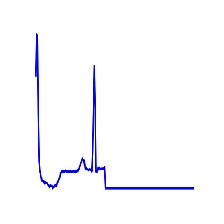

In [13]:
img

In [14]:
x=image.img_to_array(img)
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [15]:
x.shape

(224, 224, 3)

In [16]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [18]:
x.shape

(1, 224, 224, 3)

In [68]:
result= model.predict(img_data)

1/1 [==============================] - 0s 371ms/step


In [69]:
result

array([[9.9999905e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        9.2551210e-07, 8.3403831e-28]], dtype=float32)

In [70]:
itemindex=np.argmax(result, axis=1)

In [71]:
itemindex

array([0], dtype=int64)

In [72]:
itemindex = np.where(result==np.max(result))

In [73]:
itemindex

(array([0], dtype=int64), array([0], dtype=int64))

In [74]:
reverse_mapping = ['F', 'S', 'V', 'Q', 'N', 'M']
prediction_name = reverse_mapping[itemindex[1][0]]
print(prediction_name)
#printing result

F


In [7]:
img2=image.load_img('ECG_Image_data/test/Q/Q147.png',target_size=(224,224))

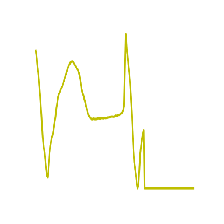

In [8]:
img2

In [36]:
x2=image.img_to_array(img2)
x2=np.expand_dims(x2,axis=0)
img_data2=preprocess_input(x2)
result2= model.predict(img_data2)
itemindex2=np.argmax(result2, axis=1)
itemindex2 = np.where(result==np.max(result))
reverse_mapping = ['F', 'S', 'V', 'Q', 'N', 'M']
prediction_name = reverse_mapping[itemindex2[1][0]]
print(prediction_name)

1/1 [==============================] - 0s 364ms/step
N


In [37]:
itemindex2

(array([0], dtype=int64), array([4], dtype=int64))

In [38]:
model.predict(img_data2)

1/1 [==============================] - 0s 363ms/step


array([[1.5023090e-34, 0.0000000e+00, 0.0000000e+00, 8.3057593e-26,
        0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [9]:
import gradio as gr
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing import image


def classify_arrhythmia(input_image):
    
    x2 = np.resize(input_image, (224,224,3))
    x2 = image.img_to_array(x2)
    x2=np.expand_dims(x2,axis=0)
    img_data2=preprocess_input(x2)
    result2= model.predict(img_data2)
    itemindex2=np.argmax(result2, axis=1)
    itemindex2 = np.where(result2==np.max(result2))
    reverse_mapping = ['F', 'S', 'V', 'Q', 'N', 'M']
    prediction_name = reverse_mapping[itemindex2[1][0]]

    return prediction_name


iface = gr.Interface(
    fn=classify_arrhythmia,
    inputs=gr.Image(label="Upload ECG Image"),
    outputs=gr.Textbox(label="Predicted Arrhythmia Type"),
    title="Arrhythmia Classification"
)


iface.launch()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 1s 1s/step


In [4]:
model2=load_model('model_vgg19_2')

In [7]:
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [20]:
img2=image.load_img('ECG_Image_data/train/N/N1.png',target_size=(224,224))

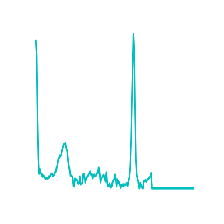

In [21]:
img2

In [22]:
x2=image.img_to_array(img2)
x2=np.expand_dims(x2,axis=0)
img_data2=preprocess_input(x2)
result2= model2.predict(img_data2)
itemindex2=np.argmax(result2, axis=1)
itemindex2 = np.where(result2==np.max(result2))
reverse_mapping = ['F', 'S', 'V', 'Q', 'N', 'M']
prediction_name = reverse_mapping[itemindex2[1][0]]
print(prediction_name)

1/1 [==============================] - 0s 370ms/step
N
